# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Generamos un dataset no-linealmente separable y vemos cómo responde el Perceptrón.
2. **MNIST**: vamos a trabajar con este conocido dataset. El objetivo es identificar dígitos, del 0 al 9, escritos a manos. Primero entrenaremos una red neuronal de una capa y luego una Red Neuronal de más capas.

## 1. Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import Sequential
from keras.layers import Dense

In [62]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=0)

# X, y = make_moons(n_samples=1000, random_state=0)

# X, y = make_circles(n_samples=1000, random_state=0)

In [63]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


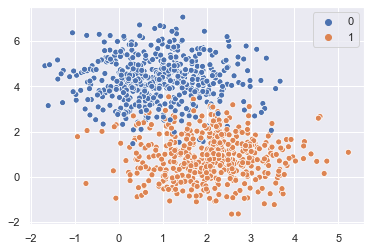

In [64]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [65]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

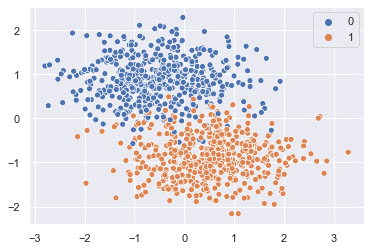

In [66]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar y volvemos a mirar algunas de sus características.

In [67]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
history = model.fit(X, y, epochs=1000, validation_split=0.25)
# history = model.fit(X, y, epochs=1000, validation_split=0.25, verbose=False)

Train on 750 samples, validate on 250 samples
Epoch 1/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.6548 - accuracy: 0.6613 - val_loss: 0.6485 - val_accuracy: 0.6920
Epoch 2/1000
750/750 [==============================] - 0s 80us/step - loss: 0.6283 - accuracy: 0.7440 - val_loss: 0.6201 - val_accuracy: 0.7800
Epoch 3/1000
750/750 [==============================] - 0s 75us/step - loss: 0.6012 - accuracy: 0.8400 - val_loss: 0.5912 - val_accuracy: 0.8600
Epoch 4/1000
750/750 [==============================] - 0s 91us/step - loss: 0.5728 - accuracy: 0.8920 - val_loss: 0.5631 - val_accuracy: 0.9080
Epoch 5/1000
750/750 [==============================] - 0s 110us/step - loss: 0.5448 - accuracy: 0.9293 - val_loss: 0.5352 - val_accuracy: 0.9280
Epoch 6/1000
750/750 [==============================] - 0s 80us/step - loss: 0.5174 - accuracy: 0.9440 - val_loss: 0.5082 - val_accuracy: 0.9280
Epoch 7/1000
750/750 [==============================] - 0s 86us/step - loss: 0.4906 

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

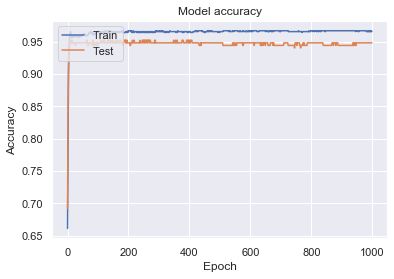

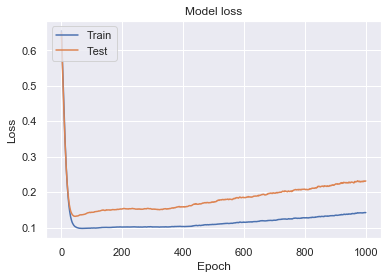

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [75]:
print(model.get_weights())

[array([[ 0.4623725 , -0.25565374, -0.38267845, -0.93325454],
       [-4.057729  ,  1.3308597 ,  3.8415399 ,  3.3325899 ]],
      dtype=float32), array([0.19402872, 0.6751542 , 0.2852795 , 0.2790457 ], dtype=float32), array([[ 4.000136 ],
       [ 2.2048264],
       [-3.0983546],
       [-1.6143122]], dtype=float32), array([-0.51029325], dtype=float32)]


Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

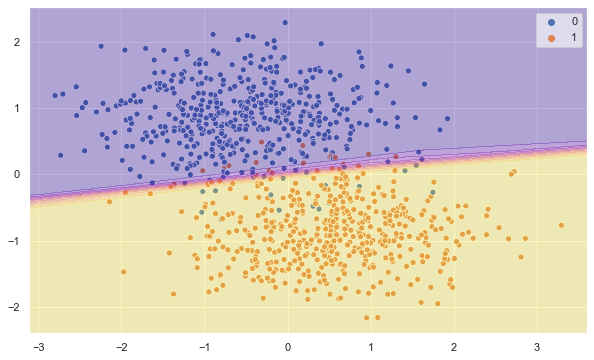

In [76]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?¿Y si hacen lo mismo para `make_circles?`

**Ejercicio**: con los datos producidos por `make_moons`, agregar una capa a la red neuronal, con 10 neuronas y función de activación `relu`.

**Ejercicio**: repetir el ejercicio anterior, pero para los datos producidos por `make_circles`.

## 2. MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo 
import random

from sklearn.model_selection import train_test_split

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [104]:
directorio = '../datasets//MNIST/'

Miramos las carpetas que hay adentro de la carpeta MNIST

In [105]:
print(os.listdir(directorio))

['.DS_Store', '9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


Creamos los contenedores vacíos

In [106]:
todas_imagenes = []
y_todas_imagenes = []

y los llenamos.

In [107]:
directorio_copy = directorio
digitos = np.arange(0,10)
for digito in digitos:
    directorio = directorio_copy + str(digito) + '/'
    print(digito, directorio)
    print('Hay', len(os.listdir(directorio)),'imagenes')
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen))
        y_todas_imagenes.append(digito)
        
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

0 ../datasets//MNIST/0/
Hay 4132 imagenes
1 ../datasets//MNIST/1/
Hay 4638 imagenes
2 ../datasets//MNIST/2/
Hay 4172 imagenes
3 ../datasets//MNIST/3/
Hay 4351 imagenes
4 ../datasets//MNIST/4/
Hay 4054 imagenes
5 ../datasets//MNIST/5/
Hay 3788 imagenes
6 ../datasets//MNIST/6/
Hay 4121 imagenes
7 ../datasets//MNIST/7/
Hay 4396 imagenes
8 ../datasets//MNIST/8/
Hay 4060 imagenes
9 ../datasets//MNIST/9/
Hay 4188 imagenes


**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [109]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[0]
ancho_imagen = todas_imagenes.shape[1]
largo_imagen = todas_imagenes.shape[2]

(41900, 28, 28) (41900,)


Miramos una imagen al azar.

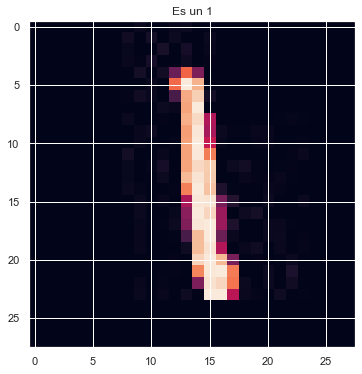

In [110]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [111]:
X = todas_imagenes.reshape(n_instancias, largo_imagen*ancho_imagen)
print(X.shape)

(41900, 784)


**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [112]:
X = X/255


**Ejercicio:** usar el `to_categorical` de Keras para llevar `y_todas_imagenes` a una columna con unos y ceros para cada clase `y` (One Hot Encoding).

In [113]:
from keras.utils import to_categorical
y = to_categorical(y_todas_imagenes)
print(y.shape)

(41900, 10)


**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test. Fijar el random state en 42.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=42)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [115]:
from keras.models import Sequential
from keras.layers import Dense
import keras

# model = COMPLETAR
# model.add(COMPLETAR)
model = Sequential()

model.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=.001)

model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=250, validation_split=0.1, verbose=False)


**Ejercicio:** ¿cuántos parámetros tiene el modelo? Recordar que hay una función de Keras que hace un *informe* de la red neuronal.

In [116]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

https://keras.io/visualization/

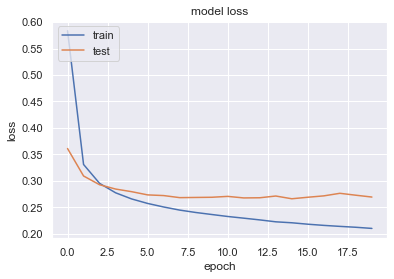

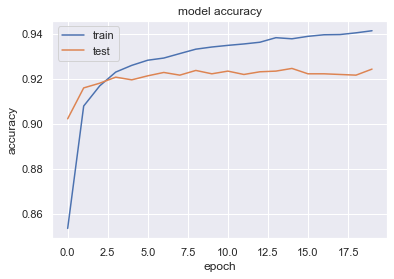

In [88]:
# from tensorflow import keras
# # from pydot import pydotprint
# dot_img_file = './model_1.png'
# keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [89]:
y_test_pred = model.predict(X_test)
y_test_pred

array([[6.9434738e-01, 7.4158089e-07, 6.7612802e-04, ..., 1.3215339e-03,
        5.2717239e-02, 1.7897286e-01],
       [1.6595623e-09, 6.3816863e-08, 1.2702792e-04, ..., 5.6933921e-08,
        2.0606755e-04, 7.3642252e-07],
       [6.7260169e-07, 4.4214490e-09, 1.3575918e-06, ..., 8.8602068e-09,
        9.9912196e-01, 5.4535037e-04],
       ...,
       [3.8391498e-08, 9.9556017e-01, 3.2769982e-03, ..., 2.5961499e-05,
        8.1403699e-04, 2.3469049e-05],
       [1.6347651e-05, 1.6134614e-04, 1.5882381e-04, ..., 7.8866599e-08,
        9.9256891e-01, 3.2115004e-03],
       [4.2411270e-05, 3.8109904e-10, 1.1223095e-03, ..., 9.6539170e-01,
        6.1989058e-06, 3.2600872e-02]], dtype=float32)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [90]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape


(8380,)

**Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [91]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

confusion_matrix(y_test, y_test_pred)

array([[842,   0,   3,   1,   2,  11,   9,   0,   4,   2],
       [  0, 942,   5,   3,   2,   2,   0,   1,  10,   3],
       [  3,   2, 732,  12,  10,   3,   9,  17,  20,   3],
       [  1,   3,  18, 744,   2,  26,   0,   7,  19,   8],
       [  4,   1,   7,   0, 798,   2,   6,   3,   5,  20],
       [ 10,   3,   9,  23,   5, 669,   8,   4,  22,   6],
       [  6,   1,   7,   0,   9,   8, 781,   1,   5,   0],
       [  2,   2,  13,   5,   4,   4,   0, 802,   2,  29],
       [ 10,  17,   9,  13,   3,  22,   3,   8, 689,  12],
       [  1,   5,   1,  18,  26,   5,   0,  25,   7, 739]])

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9233890214797136

**Ejercicio:** ¿Dónde se está confundiendo? Graficar algunos ejemplos.

In [93]:
errores = y_test != y_test_pred
errores
imagenes_errores = X_test[errores,:]
imagenes_errores

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00784314, 0.01568627, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [94]:

y_test_errores = y_test[errores]
y_test_pred_errores = y_test_pred[errores]
print(imagenes_errores.shape)

(642, 784)


In [95]:
imagenes_errores = imagenes_errores.reshape(imagenes_errores.shape[0], ancho_imagen, largo_imagen)
print(imagenes_errores.shape)

(642, 28, 28)


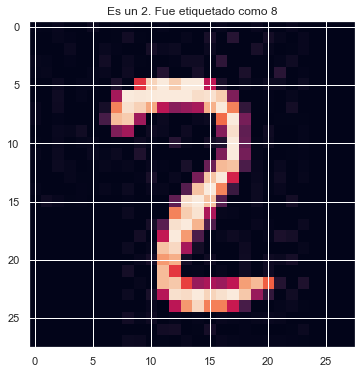

In [102]:
idx_imagen = np.random.randint(0,imagenes_errores.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_test_errores[idx_imagen]) +'. Fue etiquetado como ' + str(y_test_pred_errores[idx_imagen]))
plt.imshow(imagenes_errores[idx_imagen, :, :])
plt.show()

**Ejercicio:** Volver a entrenar, pero agregando una capa con 800 neuronas y función de activación `relu`.